**library and data**

In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "/content/drive/MyDrive/DATASET/Train/Train/Healthy"
train_files_powdery = "/content/drive/MyDrive/DATASET/Train/Train/Powdery"
train_files_rust = "/content/drive/MyDrive/DATASET/Train/Train/Rust"

test_files_healthy = "/content/drive/MyDrive/DATASET/Test/Test/Healthy"
test_files_powdery = "/content/drive/MyDrive/DATASET/Test/Test/Powdery"
test_files_rust = "/content/drive/MyDrive/DATASET/Test/Test/Rust"

valid_files_healthy = "/content/drive/MyDrive/DATASET/Validation/Validation/Healthy"
valid_files_powdery = "/content/drive/MyDrive/DATASET/Validation/Validation/Powdery"
valid_files_rust = "/content/drive/MyDrive/DATASET/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


**images**

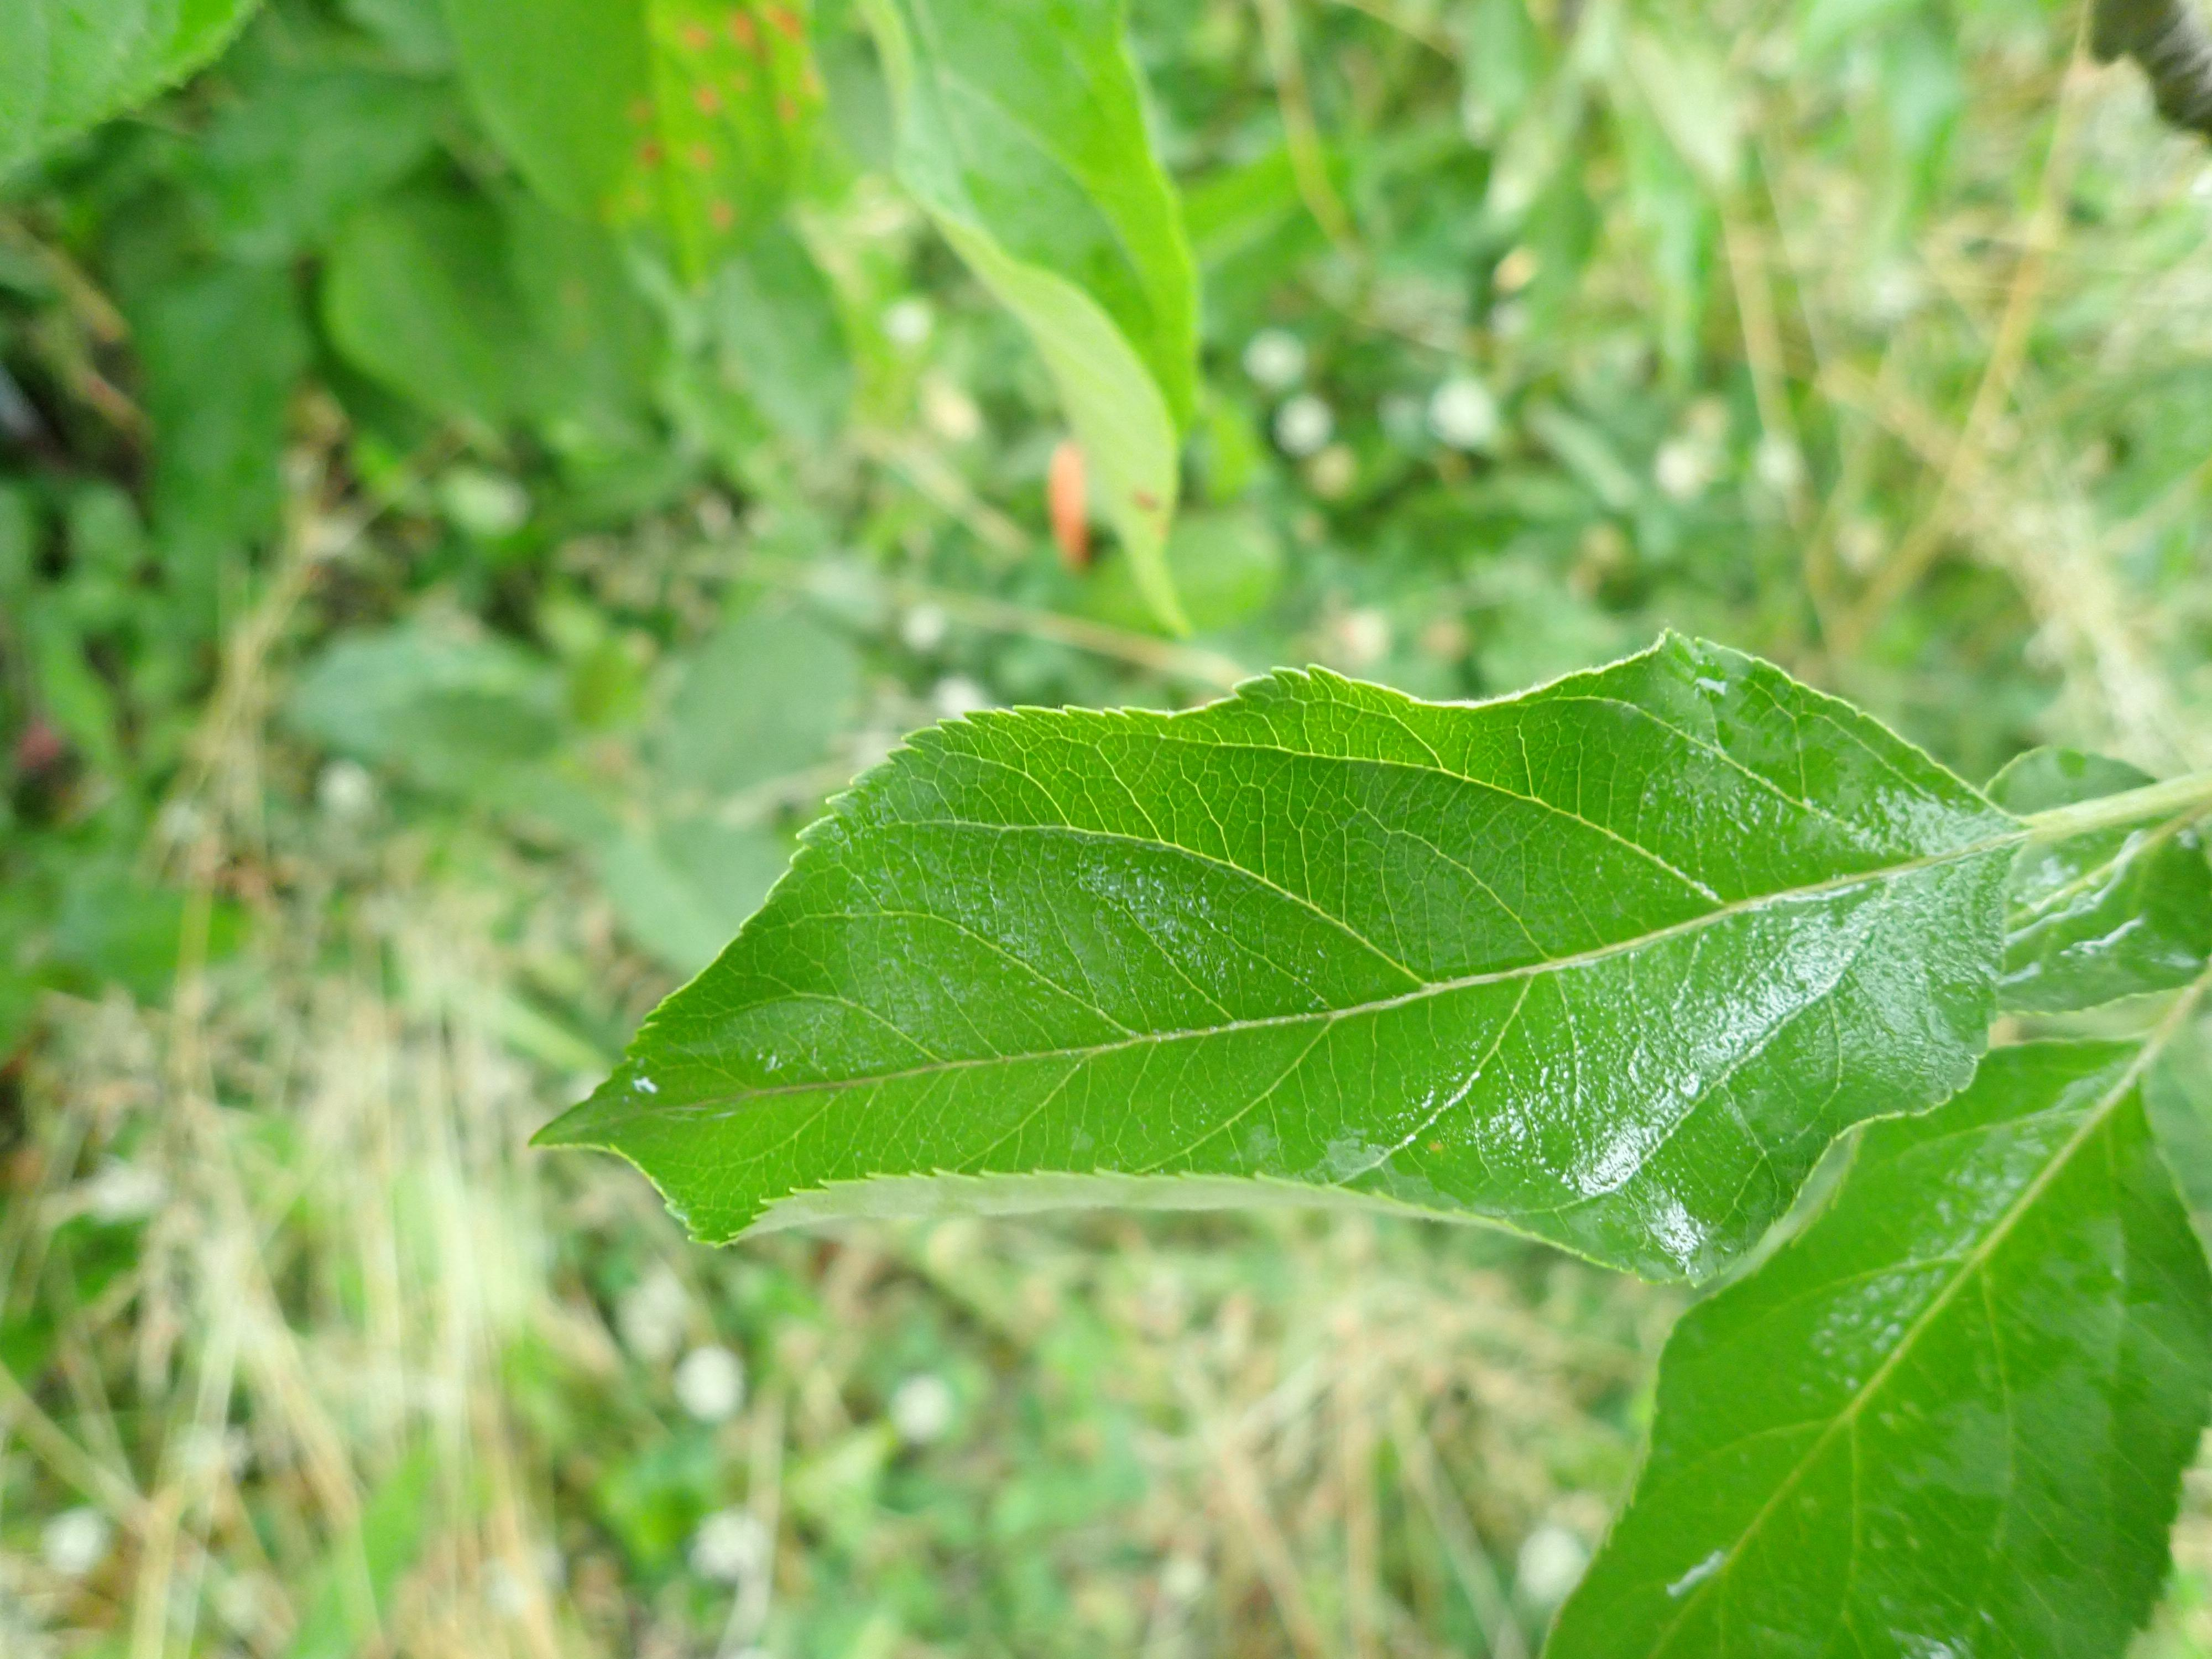

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/DATASET/Train/Train/Healthy/800edef467d27c15.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

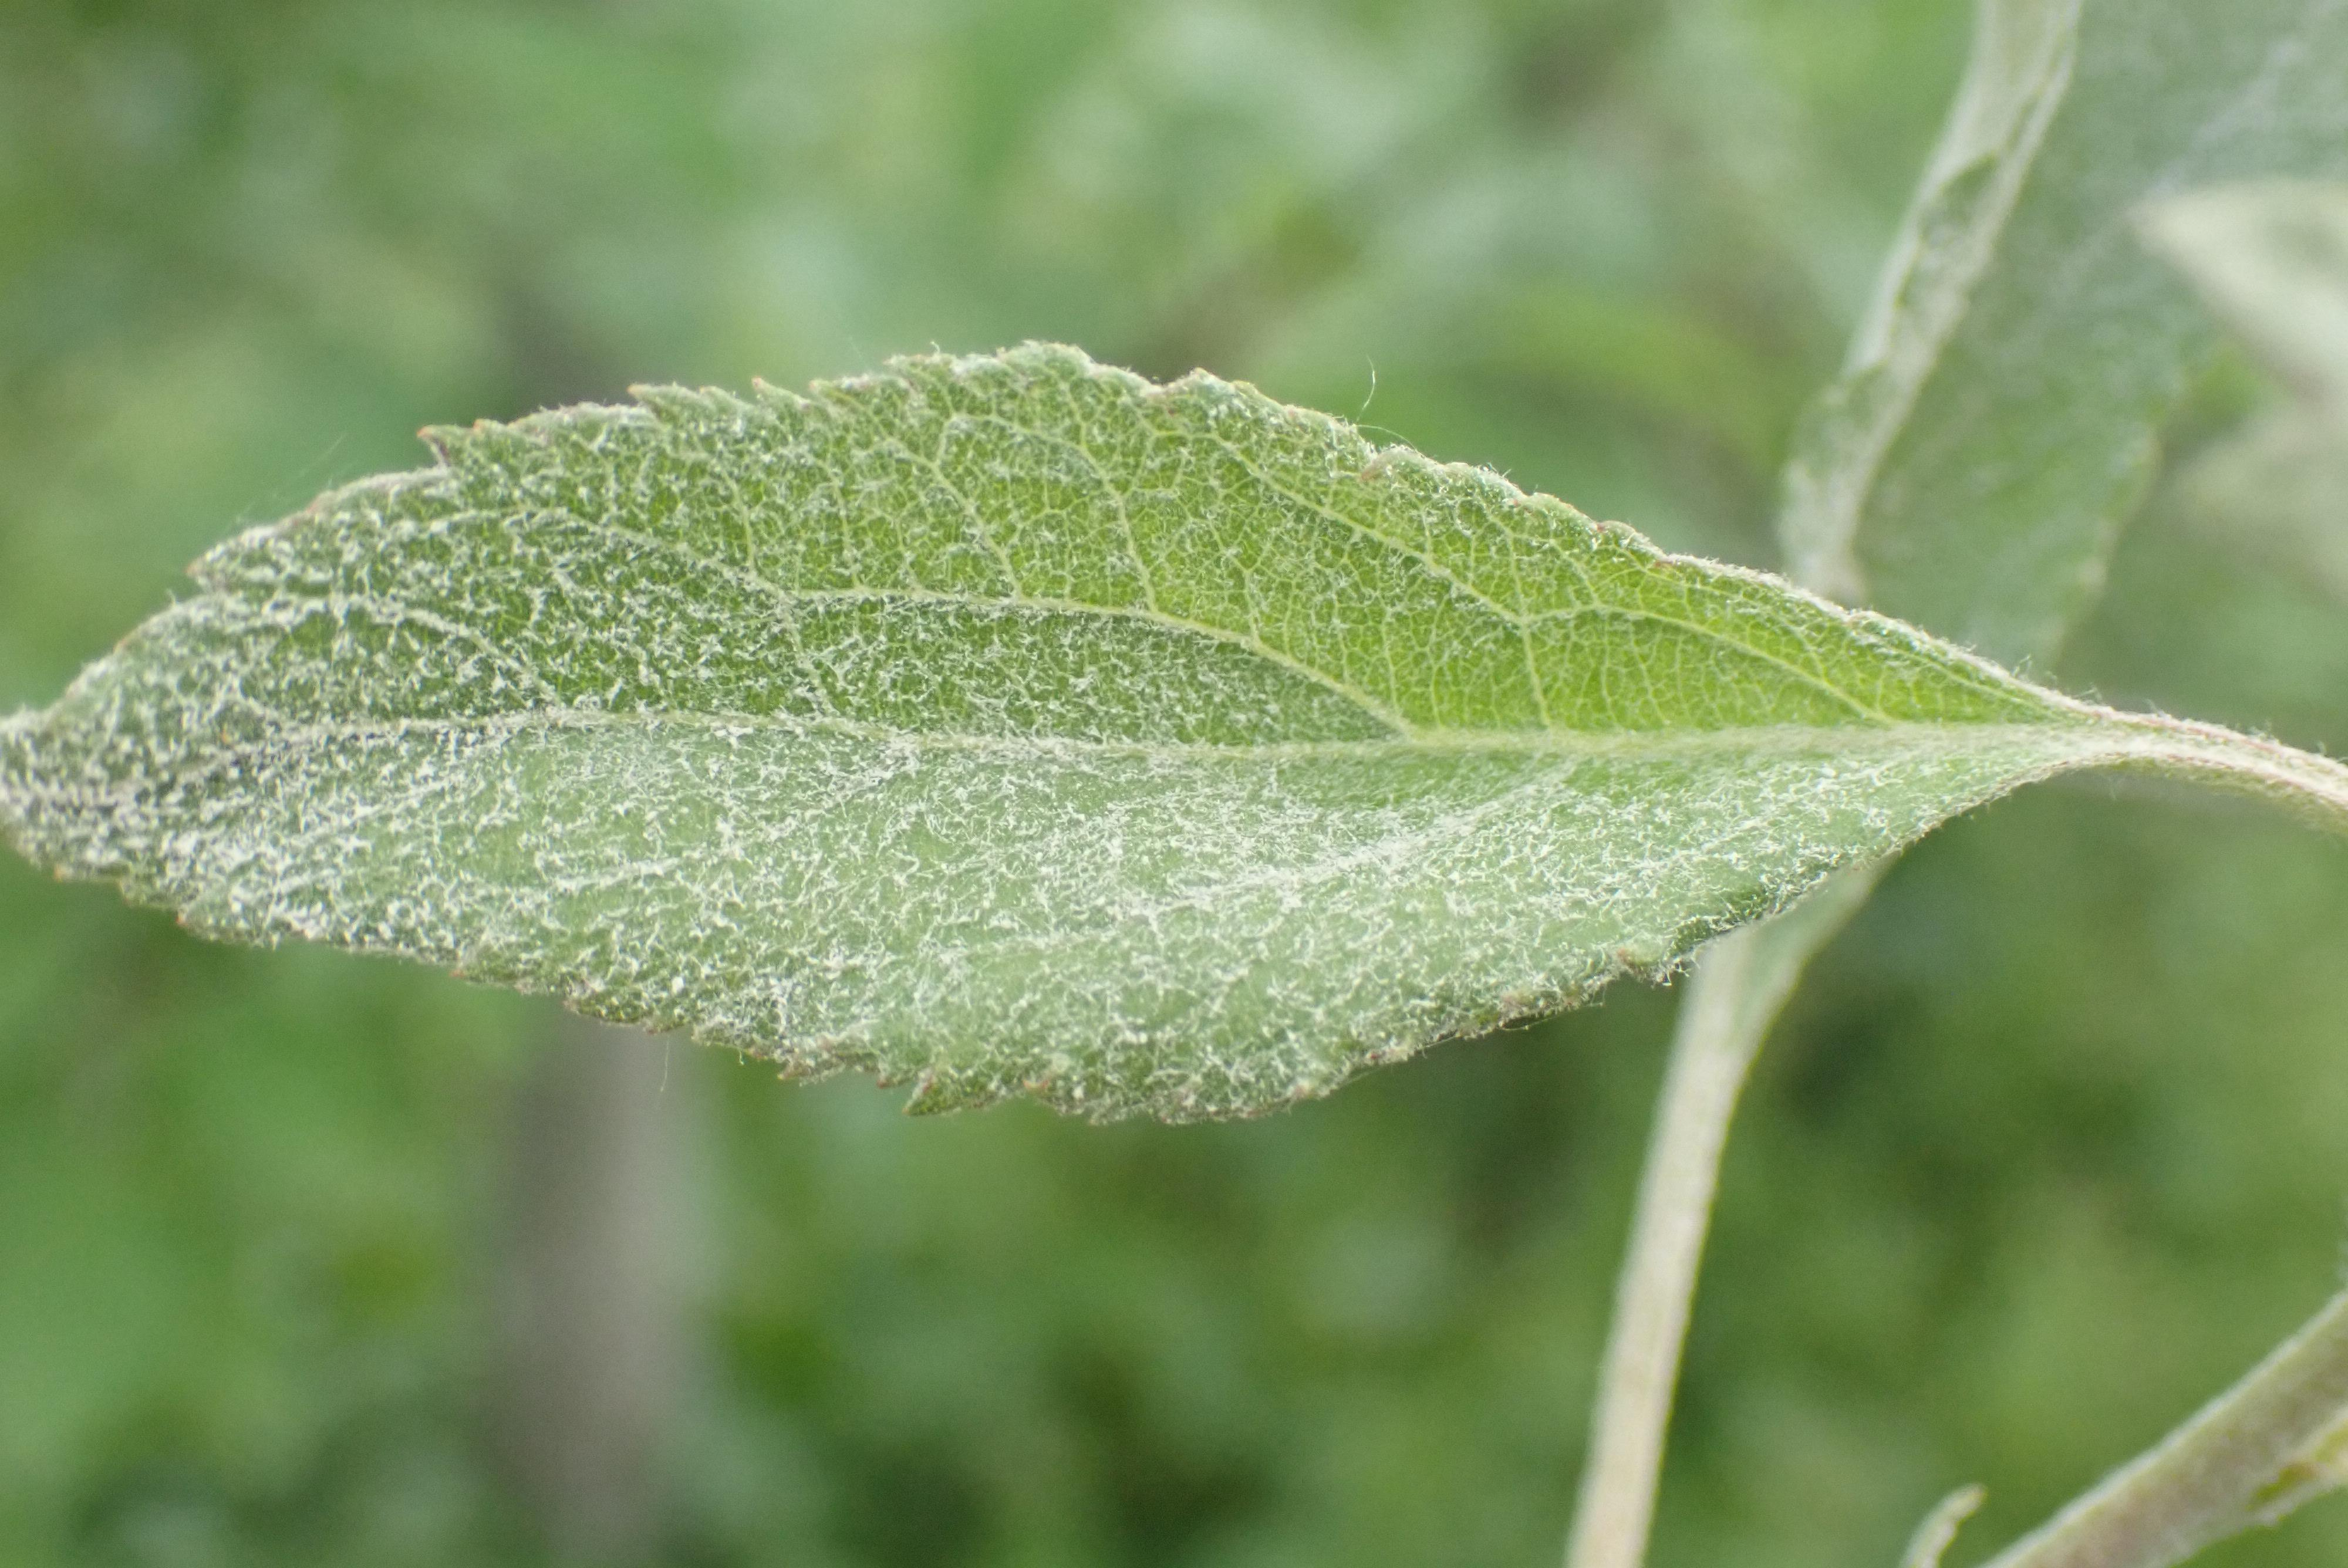

In [ ]:
image_path = '/content/drive/MyDrive/DATASET/Train/Train/Powdery/828d2f4a91754ddb.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

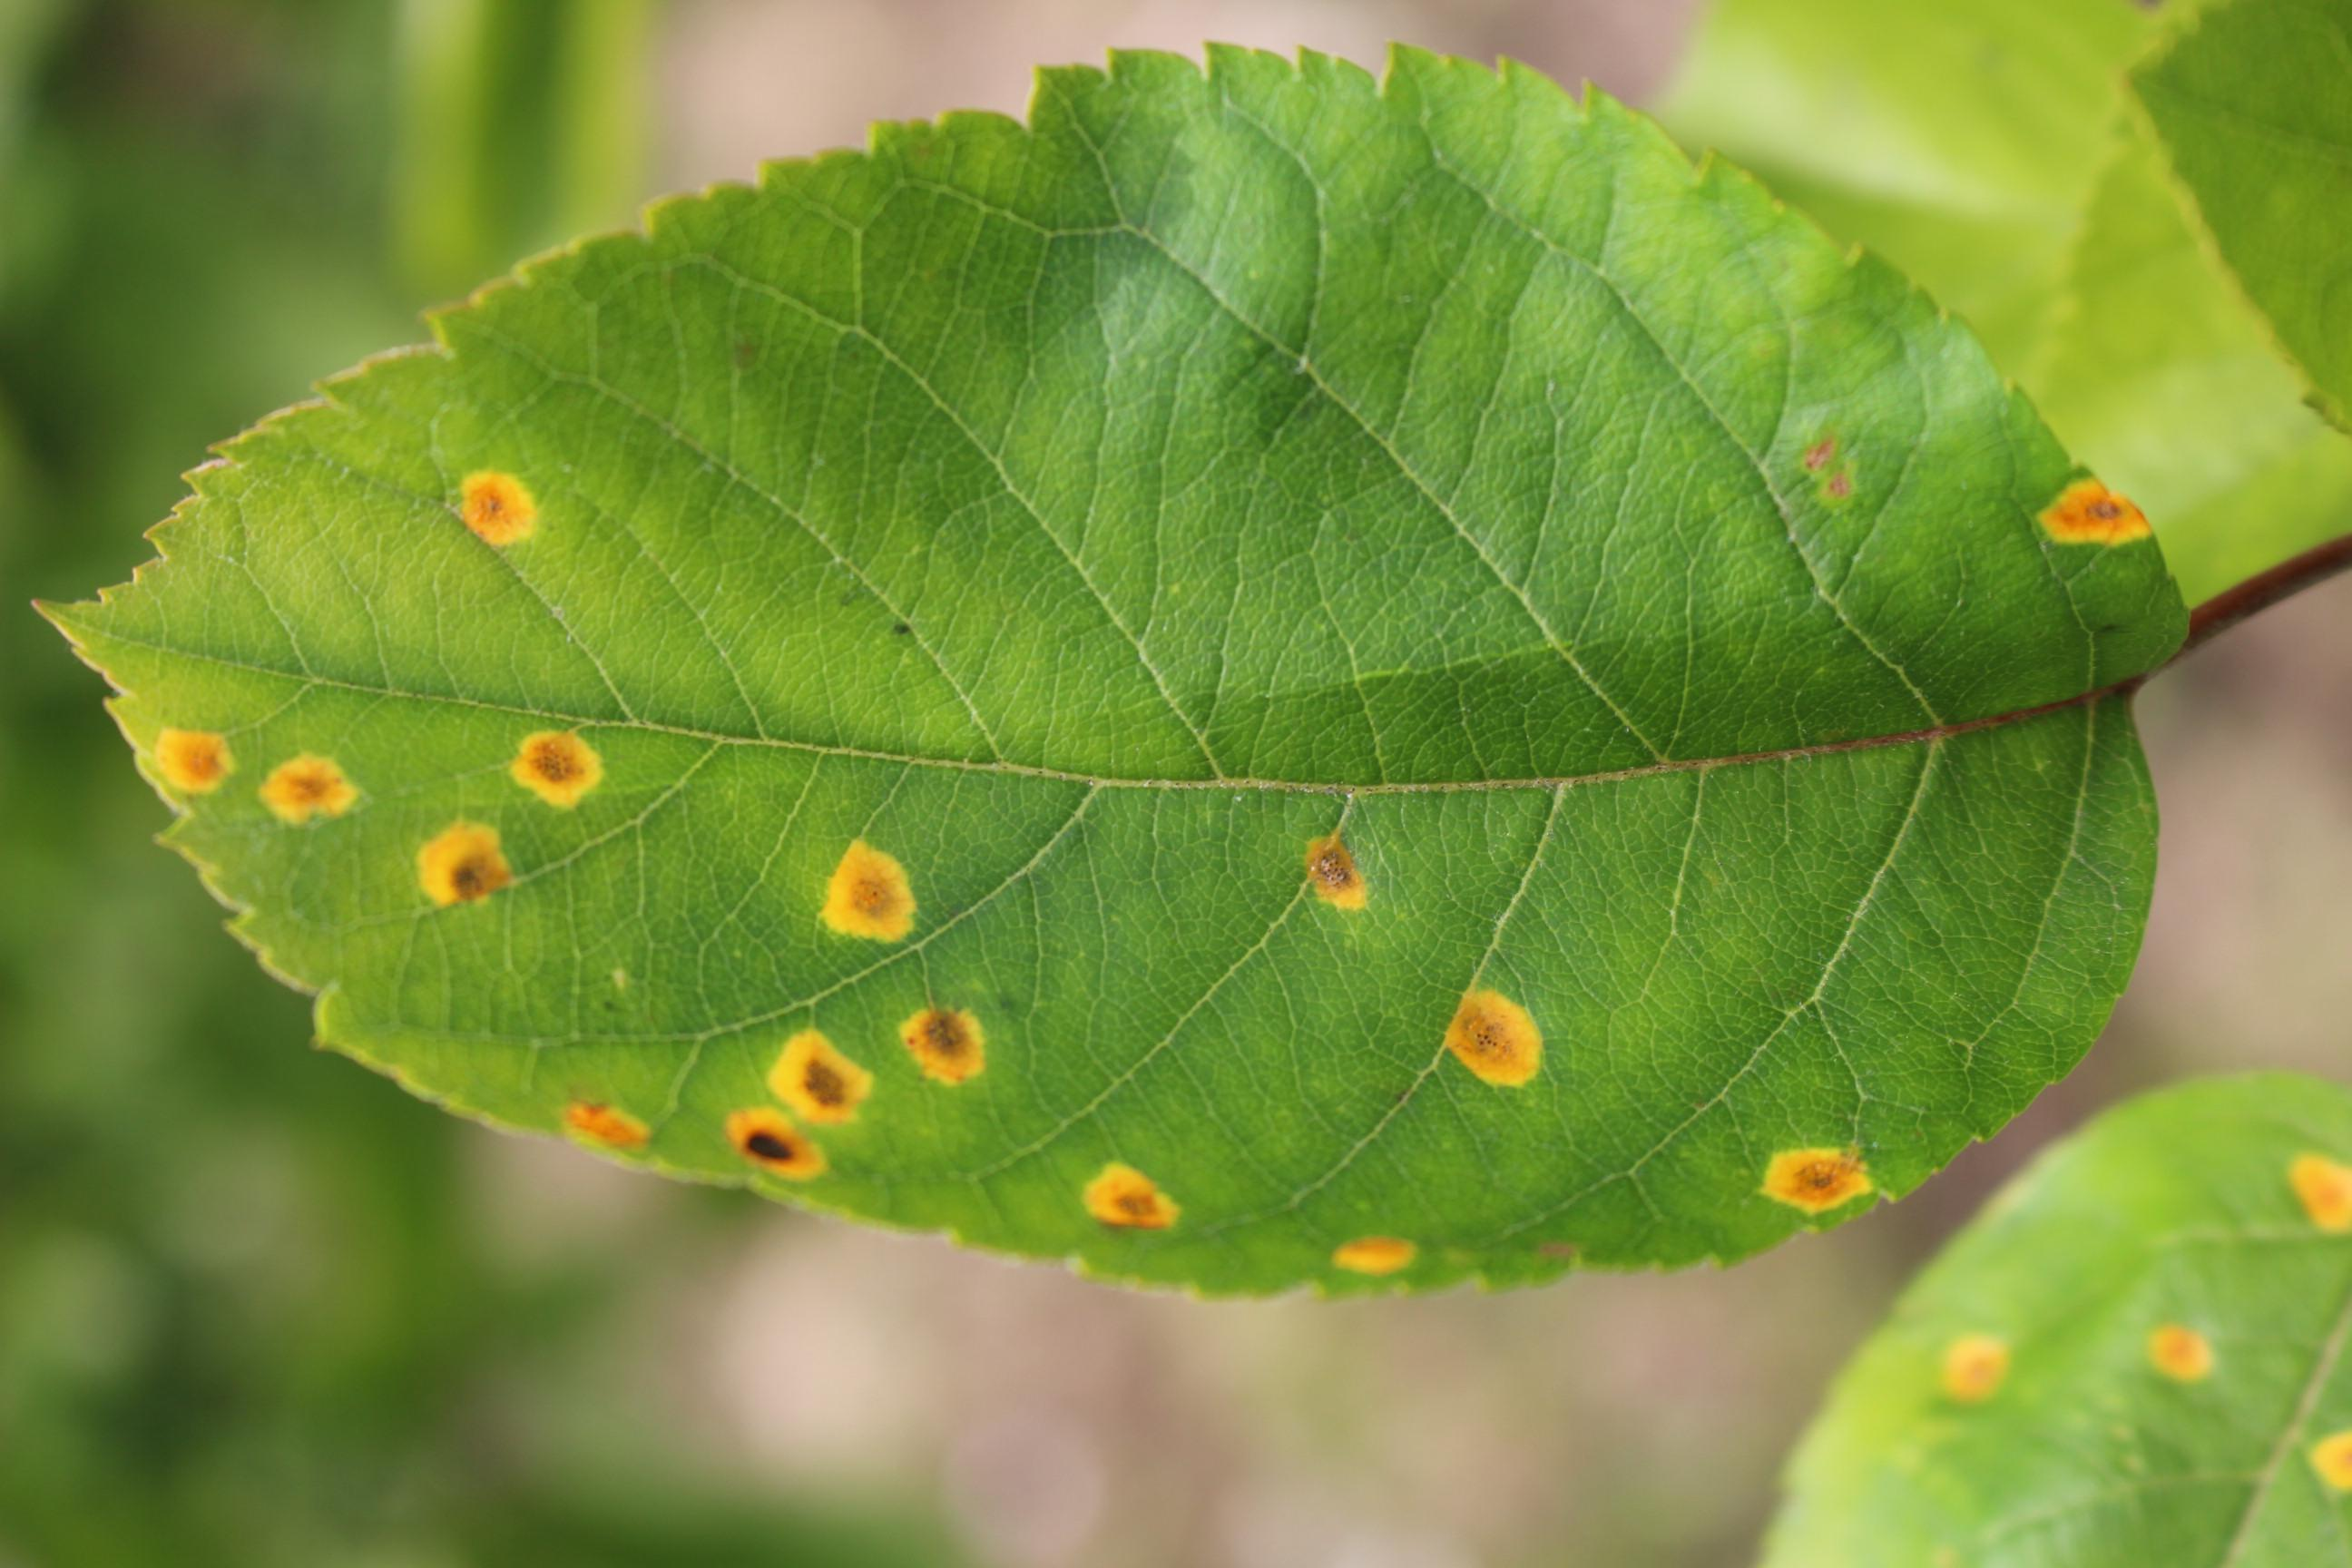

In [ ]:
image_path = '/content/drive/MyDrive/DATASET/Train/Train/Rust/80f09587dfc7988e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

**Data Generation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


**CNN model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,723,339 (273.60 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,815,560 (182.40 MB)

**Epochs**

In [ ]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=32
                    )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 295s 6s/step - accuracy: 0.3891 - loss: 4.8490 - val_accuracy: 0.5167 - val_loss: 0.9885
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 284s 5s/step - accuracy: 0.7405 - loss: 0.6072 - val_accuracy: 0.7333 - val_loss: 0.6639
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.8432 - loss: 0.4111 - val_accuracy: 0.8167 - val_loss: 0.5745
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.9022 - loss: 0.2766 - val_accuracy: 0.8667 - val_loss: 0.3364
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.9202 - loss: 0.2452 - val_accuracy: 0.7500 - val_loss: 0.5954
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 239s 5s/step - accuracy: 0.9135 - loss: 0.2771 - val_accuracy: 0.8000 - val_loss: 0.5362
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 276s 6s/step - accuracy: 0.9288 - loss: 0.1956 - val_accuracy: 0.8667 - val_loss: 0.3513
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.9407 - loss: 0.1914 - val_accuracy: 0.9167 - val_loss: 0.

**Visualization**

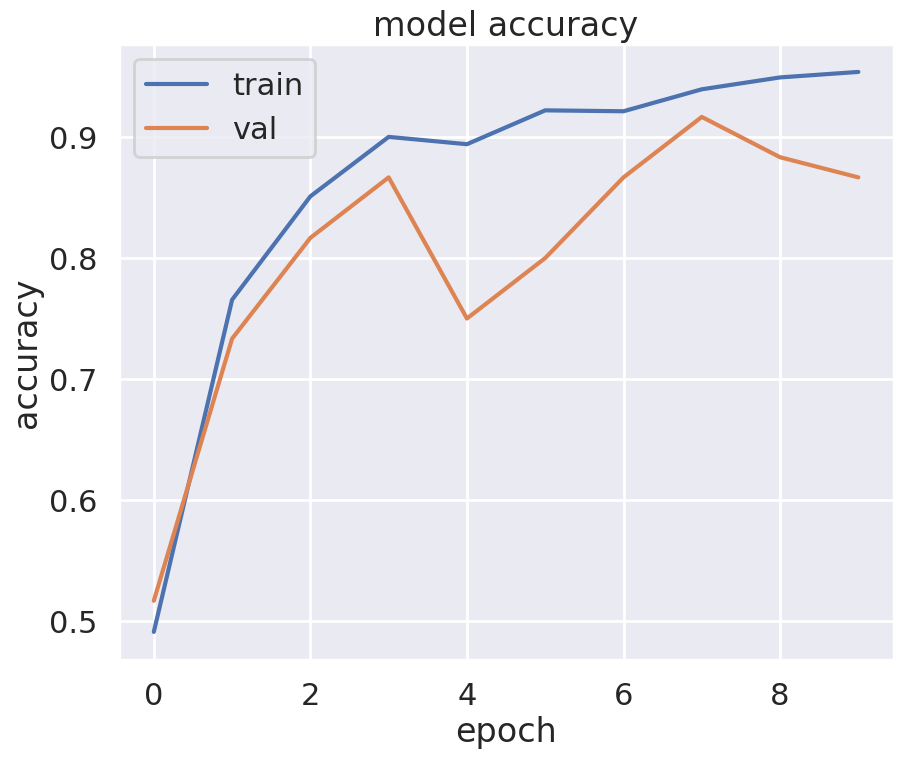

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(10, 8), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**PREDICTION**

In [ ]:
model.save("disease_disease_recognition.h5")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/DATASET/Test/Test/Rust/831abdc76c05e23d.jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([8.21988955e-02, 1.24153985e-05, 9.17788684e-01], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
